<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDS0103ENSkillsNetwork983-2022-01-01"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="400"> </a>

# From Understanding to Preparation

Estimated time needed: **20** minutes

## Objectives

After completing this lab you will be able to:

-   Understand Data 
-   Prepare Data for analysis and inference


## Introduction

In this lab, we will continue learning about the data science methodology, and focus on the **Data Understanding** and the **Data Preparation** stages.


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [Recap](#0)<br>
2. [Data Understanding](#2)<br>
3. [Data Preparation](#4)<br>
</div>
<hr>


# Recap <a id="0"></a>


In Lab **From Requirements to Collection**, we learned that the data we need to answer the question developed in the business understanding stage, namely _can we automate the process of determining the cuisine of a given recipe?_, is readily available. A researcher named Yong-Yeol Ahn scraped tens of thousands of food recipes (cuisines and ingredients) from three different websites, namely:


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig3_allrecipes.png" width="500">
<div align="center">
www.allrecipes.com
</div>
<br/><br/>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig4_epicurious.png" width="500">
<div align="center">
www.epicurious.com
</div>
<br/><br/>
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/images/lab2_fig5_menupan.png" width="500">
<div align="center">
www.menupan.com
</div>
<br/><br/>


For more information on Yong-Yeol Ahn and his research, you can read his paper on [Flavor Network and the Principles of Food Pairing](http://yongyeol.com/papers/ahn-flavornet-2011.pdf?utm_medium=Exinfluencer&utm_source=Nurture&utm_content=000026UJ&utm_term=10006555&utm_id=SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork-20083987&utm_email=Email&utm_campaign=PLACEHOLDER).


We also collected the data and placed it on an IBM server for your convenience.

* * *


# Data Understanding <a id="2"></a>


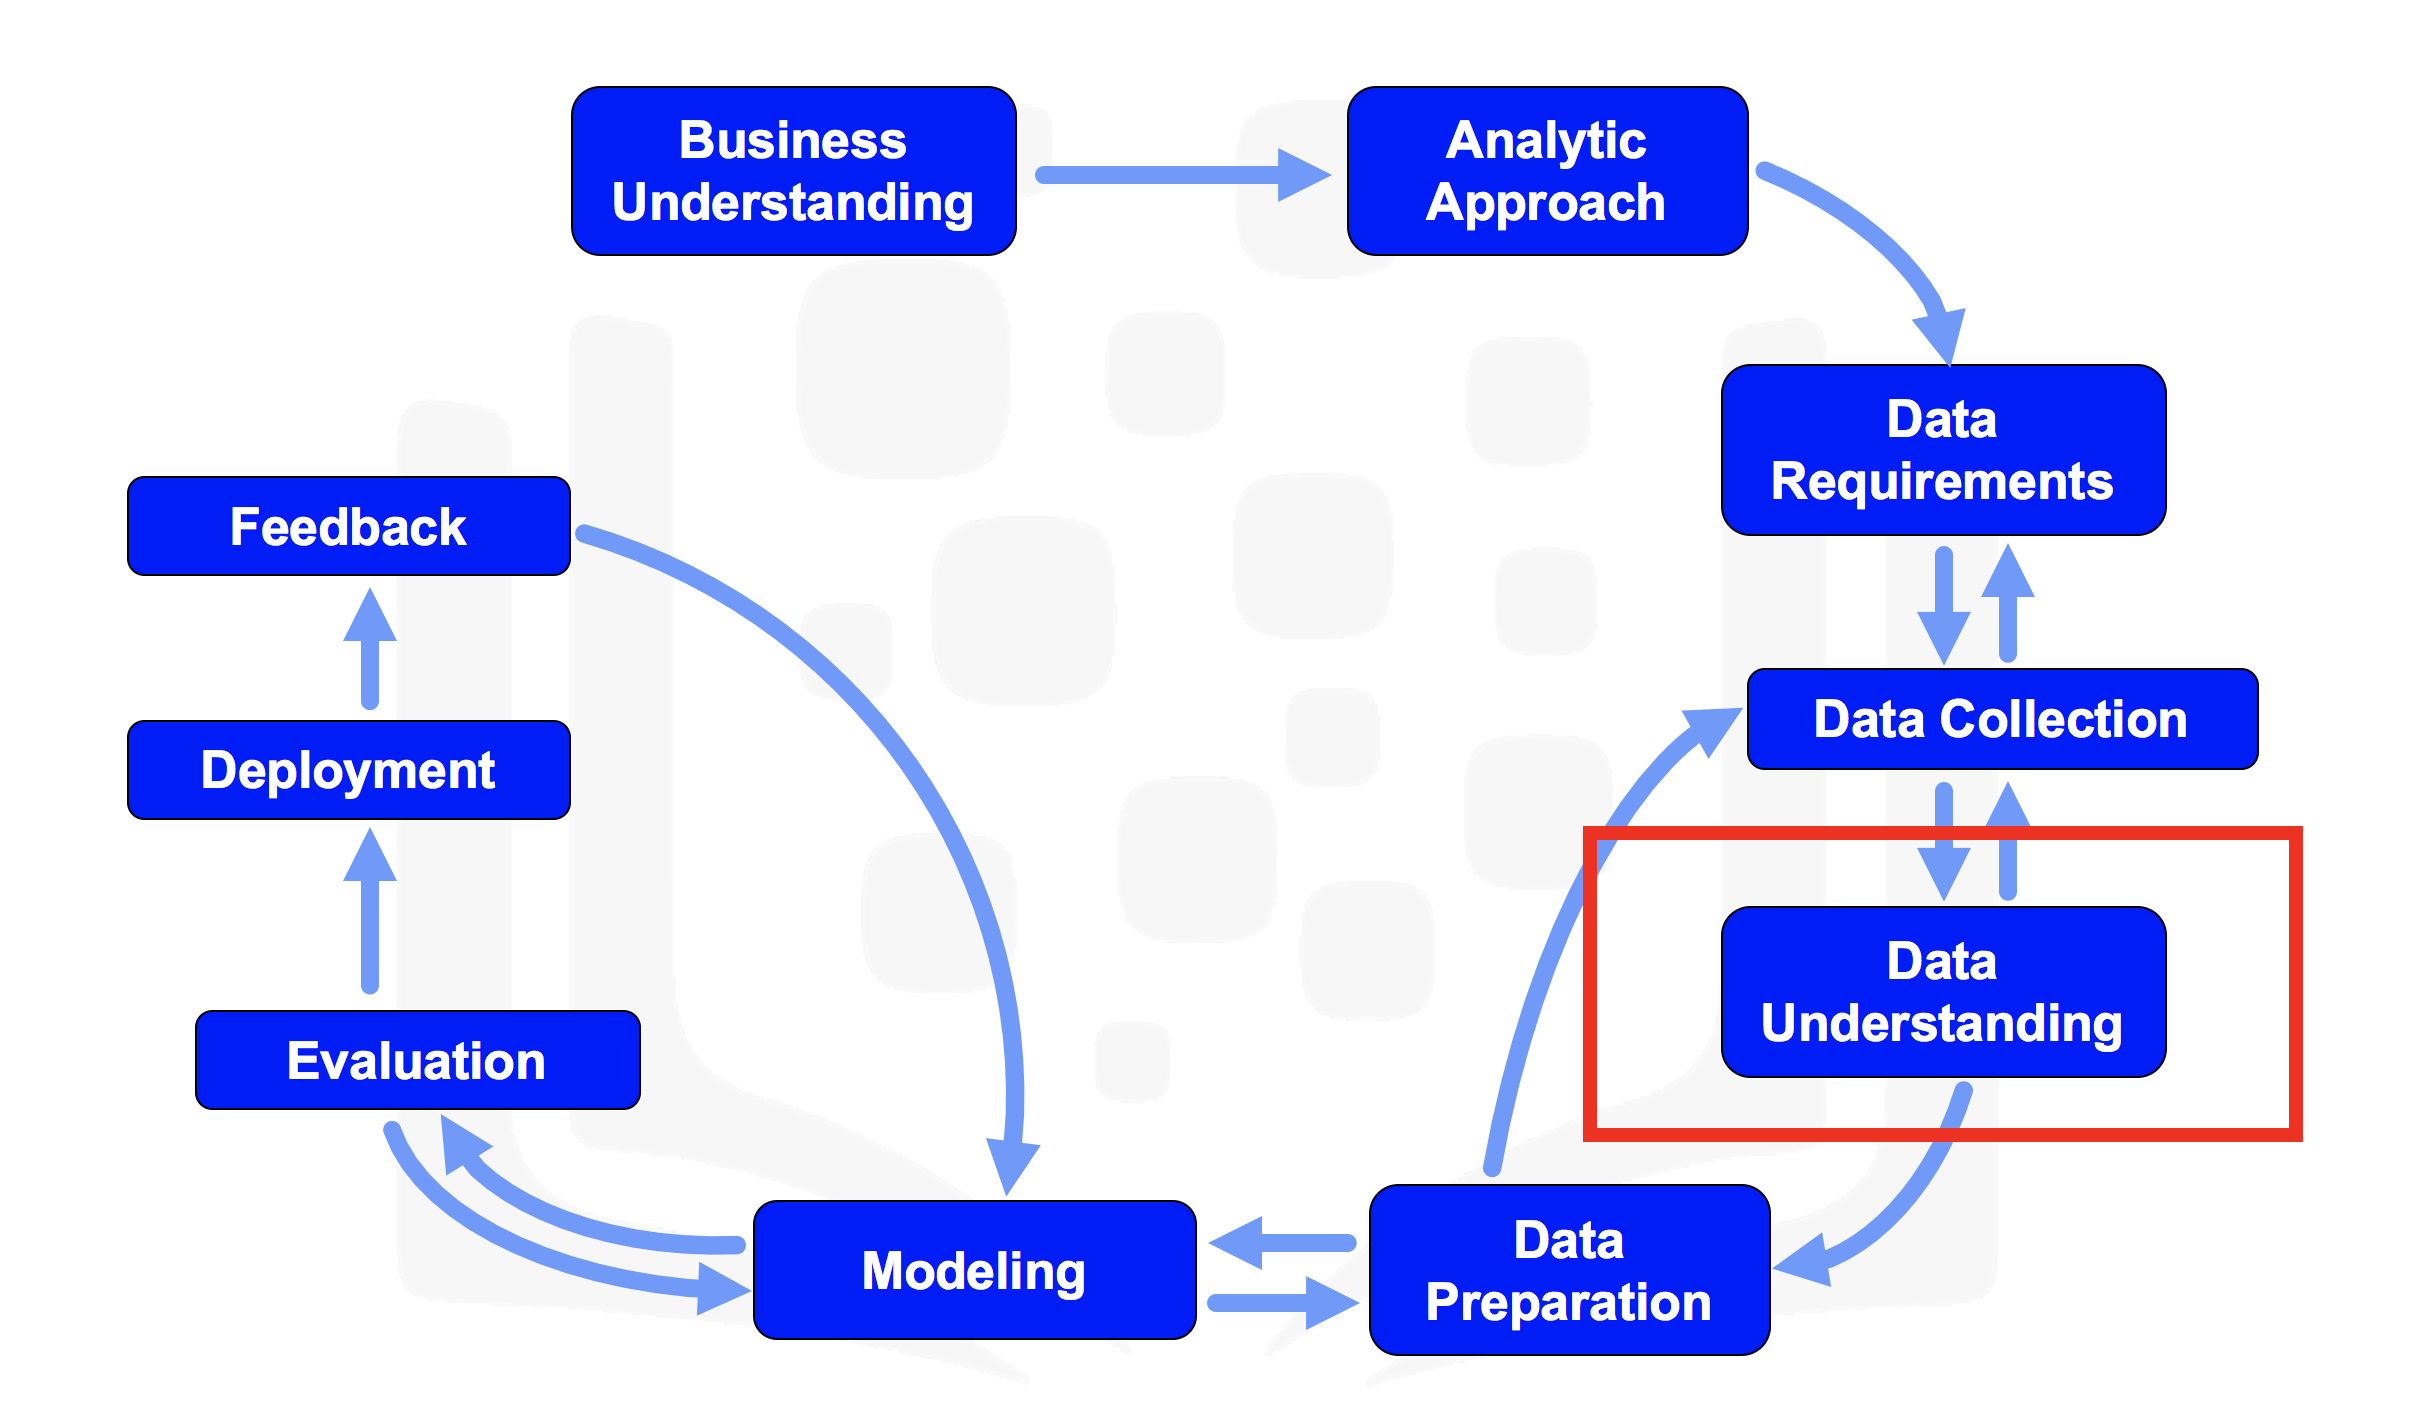<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%203/images/flowchart_data_understanding.png" width="500">


<strong>Important note:</strong> Please note that you are not expected to know how to program in python. The following code is meant to illustrate the stage of data collection, so it is totally fine if you do not understand the individual lines of code. There will be a full course in this certificate on programming in python, <a href="http://cocl.us/PY0101EN_DS0103EN_LAB3_PYTHON_edX">Python for Data Science</a>, which will teach you how to program in Python if you decide to complete this certificate.


### Using this notebook:

To run any of the following cells of code, you can type **Shift + Enter** to excute the code in a cell.


Get the version of Python installed.


In [41]:
# check Python version if running locally
# !python -V

Download the library and dependencies that we will need to run this lab.


In [42]:
import pandas as pd # import library to read data into dataframe
pd.set_option('display.max_columns', None)
import numpy as np # import numpy library
import re # import library for regular expression

Download the data from the IBM server and read it into a _pandas_ dataframe.


In [46]:
# Uncomment if running locally, else download data using the following code cell
#recipes = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv")

#print(""Data read into dataframe!"")

In [ ]:
import piplite
await piplite.install(['skillsnetwork'])
import skillsnetwork

# Download to current directory with same filename
await skillsnetwork.download_dataset(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%202/recipes.csv",
    "recipes.csv")

recipes = pd.read_csv("recipes.csv")
print("Data read into dataframe!") # takes about 30 seconds

Show the first few rows.


In [ ]:
recipes.head()

Get the dimensions of the dataframe.


In [ ]:
recipes.shape

So our dataset consists of 57,691 recipes. Each row represents a recipe, and for each recipe, the corresponding cuisine is documented as well as whether 384 ingredients exist in the recipe or not, beginning with almond and ending with zucchini.


We know that a basic sushi recipe includes the ingredients:

-   rice
-   soy sauce
-   wasabi
-   some fish/vegetables


Let's check that these ingredients exist in our dataframe:


In [ ]:
ingredients = list(recipes.columns.values)

print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(rice).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(wasabi).*")).search(ingredient)] if match])
print([match.group(0) for ingredient in ingredients for match in [(re.compile(".*(soy).*")).search(ingredient)] if match])

Yes, they do!

-   rice exists as rice.
-   wasabi exists as wasabi.
-   soy exists as soy_sauce.

So maybe if a recipe contains all three ingredients: rice, wasabi, and soy_sauce, then we can confidently say that the recipe is a **Japanese** cuisine! Let's keep this in mind!

* * *


# Data Preparation <a id="4"></a>


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0103EN-SkillsNetwork/labs/Module%203/images/lab3_fig5_flowchart_data_preparation.png" width="500">


In this section, we will prepare data for the next stage in the data science methodology, which is modeling. This stage involves exploring the data further and making sure that it is in the right format for the machine learning algorithm that we selected in the analytic approach stage, which is decision trees.


First, look at the data to see if it needs cleaning.


In [ ]:
recipes["country"].value_counts()  frequency table

By looking at the above table, we can make the following observations:

1.  Cuisine column is labeled as Country, which is inaccurate.
2.  Cuisine names are not consistent as not all of them start with an uppercase first letter.
3.  Some cuisines are duplicated as variation of the country name, such as Vietnam and Vietnamese.
4.  Some cuisines have very few recipes.


#### Let's fix these problems.


Fix the name of the column showing the cuisine.


In [ ]:
column_names = recipes.columns.values
column_names[0] = "cuisine"
recipes.columns = column_names

recipes

Make all the cuisine names lowercase.


In [ ]:
recipes["cuisine"] = recipes["cuisine"].str.lower()

Make the cuisine names consistent.


In [ ]:
recipes.loc[recipes["cuisine"] == "austria", "cuisine"] = "austrian"
recipes.loc[recipes["cuisine"] == "belgium", "cuisine"] = "belgian"
recipes.loc[recipes["cuisine"] == "china", "cuisine"] = "chinese"
recipes.loc[recipes["cuisine"] == "canada", "cuisine"] = "canadian"
recipes.loc[recipes["cuisine"] == "netherlands", "cuisine"] = "dutch"
recipes.loc[recipes["cuisine"] == "france", "cuisine"] = "french"
recipes.loc[recipes["cuisine"] == "germany", "cuisine"] = "german"
recipes.loc[recipes["cuisine"] == "india", "cuisine"] = "indian"
recipes.loc[recipes["cuisine"] == "indonesia", "cuisine"] = "indonesian"
recipes.loc[recipes["cuisine"] == "iran", "cuisine"] = "iranian"
recipes.loc[recipes["cuisine"] == "italy", "cuisine"] = "italian"
recipes.loc[recipes["cuisine"] == "japan", "cuisine"] = "japanese"
recipes.loc[recipes["cuisine"] == "israel", "cuisine"] = "israeli"
recipes.loc[recipes["cuisine"] == "korea", "cuisine"] = "korean"
recipes.loc[recipes["cuisine"] == "lebanon", "cuisine"] = "lebanese"
recipes.loc[recipes["cuisine"] == "malaysia", "cuisine"] = "malaysian"
recipes.loc[recipes["cuisine"] == "mexico", "cuisine"] = "mexican"
recipes.loc[recipes["cuisine"] == "pakistan", "cuisine"] = "pakistani"
recipes.loc[recipes["cuisine"] == "philippines", "cuisine"] = "philippine"
recipes.loc[recipes["cuisine"] == "scandinavia", "cuisine"] = "scandinavian"
recipes.loc[recipes["cuisine"] == "spain", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "portugal", "cuisine"] = "spanish_portuguese"
recipes.loc[recipes["cuisine"] == "switzerland", "cuisine"] = "swiss"
recipes.loc[recipes["cuisine"] == "thailand", "cuisine"] = "thai"
recipes.loc[recipes["cuisine"] == "turkey", "cuisine"] = "turkish"
recipes.loc[recipes["cuisine"] == "vietnam", "cuisine"] = "vietnamese"
recipes.loc[recipes["cuisine"] == "uk-and-ireland", "cuisine"] = "uk-and-irish"
recipes.loc[recipes["cuisine"] == "irish", "cuisine"] = "uk-and-irish"

recipes

Remove cuisines with < 50 recipes.


In [ ]:
# get list of cuisines to keep
recipes_counts = recipes["cuisine"].value_counts()
cuisines_indices = recipes_counts > 50

cuisines_to_keep = list(np.array(recipes_counts.index.values)[np.array(cuisines_indices)])

In [ ]:
rows_before = recipes.shape[0] # number of rows of original dataframe
print("Number of rows of original dataframe is {}.".format(rows_before))

recipes = recipes.loc[recipes['cuisine'].isin(cuisines_to_keep)]

rows_after = recipes.shape[0] # number of rows of processed dataframe
print("Number of rows of processed dataframe is {}.".format(rows_after))

print("{} rows removed!".format(rows_before - rows_after))

Convert all Yes's to 1's and the No's to 0's


In [30]:
recipes = recipes.replace(to_replace="Yes", value=1)
recipes = recipes.replace(to_replace="No", value=0)

#### Let's analyze the data a little more in order to learn the data better and note any interesting preliminary observations.


Run the following cell to get the recipes that contain **rice** _and_ **soy** _and_ **wasabi** _and_ **seaweed**.


In [ ]:
recipes.head()

In [ ]:
check_recipes = recipes.loc[
    (recipes["rice"] == 1) &
    (recipes["soy_sauce"] == 1) &
    (recipes["wasabi"] == 1) &
    (recipes["seaweed"] == 1)
]

check_recipes

Based on the results of the above code, can we classify all recipes that contain **rice** _and_ **soy** _and_ **wasabi** _and_ **seaweed** as **Japanese** recipes? Why?


<details><summary>Click here for a solution</summary>

```python
   #The correct answer is:
    
    No, because other recipes such as Asian and East_Asian recipes also contain these ingredients.
```

</details>


Let's count the ingredients across all recipes.


In [ ]:
# sum each column
ing = recipes.iloc[:, 1:].sum(axis=0)

In [ ]:
# define each column as a pandas series
ingredient = pd.Series(ing.index.values, index = np.arange(len(ing)))
count = pd.Series(list(ing), index = np.arange(len(ing)))

# create the dataframe
ing_df = pd.DataFrame(dict(ingredient = ingredient, count = count))
ing_df = ing_df[["ingredient", "count"]]
print(ing_df.to_string())

Now we have a dataframe of ingredients and their total counts across all recipes. Let's sort this dataframe in descending order.


In [ ]:
ing_df.sort_values(["count"], ascending=False, inplace=True)
ing_df.reset_index(inplace=True, drop=True)

print(ing_df)

#### What are the 3 most popular ingredients?


<details><summary>Click here for a solution</summary>

```python
   #1. Egg with <strong>21,025</strong> occurrences. 
# 2. Wheat with <strong>20,781</strong> occurrences. 
# 3. Butter with <strong>20,719</strong> occurrences.
```

</details>


However, note that there is a problem with the above table. There are ~40,000 American recipes in our dataset, which means that the data is biased towards American ingredients.


**Therefore**, let's compute a more objective summary of the ingredients by looking at the ingredients per cuisine.


#### Let's create a _profile_ for each cuisine.

In other words, let's try to find out what ingredients Chinese people typically use, and what is **Canadian** food for example.


In [ ]:
cuisines = recipes.groupby("cuisine").mean()
cuisines.head()

As shown above, we have just created a dataframe where each row is a cuisine and each column (except for the first column) is an ingredient, and the row values represent the percentage of each ingredient in the corresponding cuisine.

**For example**:

-   _almond_ is present across 15.65% of all of the **African** recipes.
-   _butter_ is present across 38.11% of all of the **Canadian** recipes.


Let's print out the profile for each cuisine by displaying the top four ingredients in each cuisine.


In [ ]:
num_ingredients = 4 # define number of top ingredients to print

# define a function that prints the top ingredients for each cuisine
def print_top_ingredients(row):
    print(row.name.upper())
    row_sorted = row.sort_values(ascending=False)*100
    top_ingredients = list(row_sorted.index.values)[0:num_ingredients]
    row_sorted = list(row_sorted)[0:num_ingredients]

    for ind, ingredient in enumerate(top_ingredients):
        print("%s (%d%%)" % (ingredient, row_sorted[ind]), end=' ')
    print("\n")

# apply function to cuisines dataframe
create_cuisines_profiles = cuisines.apply(print_top_ingredients, axis=1)

At this point, we feel that we have understood the data well and the data is ready and is in the right format for modeling!

* * *


### Thank you for completing this lab!

This notebook is part of a course called _The Data Science Method_. If you accessed this notebook outside the course, you can take this course, online by clicking [here](https://cocl.us/DS0103EN-Exercise-From-Understanding-to-Preparation).

## Author

<a href="https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDS0103ENSkillsNetwork983-2022-01-01" target="_blank">Alex Aklson</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                 |
| ----------------- | ------- | ---------- | ---------------------------------- |
| 2021-04-06        | 2.2     | Malika     | Updated dataset link               |
| 2020-09-23        | 2.1     | Lakshmi    | Fixed Typo errors                  |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
